In [ ]:
!pip install opencv-python

# GEEKCAMP202204用コード


In [ ]:
!dir


drive  sample_data


In [ ]:
import glob
import os
import cv2
"""
dataディレクトリから画像を読み込んで顔を切り取ってfaceディレクトリに保存.
"""
names = ["terada","kanemura","miyata","yamaguchi","yoda"]
out_dir = "/content"
os.makedirs(out_dir, exist_ok=True)
for i in range(len(names)):
    #元画像を取り出して顔部分を正方形で囲み、64×64pにリサイズ、別のファイルにどんどん入れてく
    in_dir = "/content/drive/MyDrive/dateset/geekcamp224/"+names[i]+"/*.jpg"
    in_jpg = glob.glob(in_dir)
    os.makedirs(out_dir +"/"+ names[i], exist_ok=True)
    # print(in_jpg)
    print(len(in_jpg))
    for num in range(len(in_jpg)):
        image=cv2.imread(str(in_jpg[num]))
        if image is None:
            print("Not open:",num)
            continue

        image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        cascade = cv2.CascadeClassifier("/content/drive/MyDrive/co_works/geekcamp224/haarcascade_frontalface_alt.xml")
        # 顔認識の実行
        face_list=cascade.detectMultiScale(image_gs, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
        #顔が１つ以上検出された時
        if len(face_list) > 0:
            for rect in face_list:
                x,y,width,height=rect
                image = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
                if image.shape[0]<64:
                    continue
                image = cv2.resize(image,(64,64))
                #保存
                fileName=os.path.join(out_dir+"/"+names[i],str(num)+".jpg")
                cv2.imwrite(str(fileName),image)
                print(str(num)+".jpgを保存しました.")
        #顔が検出されなかった時
        else:
            print("no face")
            continue
        print(image.shape)

In [ ]:
import glob
import os
"""
dataディレクトリから画像を読み込んで顔を切り取ってfaceディレクトリに保存.
"""
names = ["terada","kanemura","miyata","yamaguchi","yoda"]

for name in names:
  in_dir = "/content/drive/MyDrive/dateset/geekcamp224/face/"+name+"/*.jpg"
  in_jpg = glob.glob(in_dir)
  # print(in_jpg)
  print(name+":",end="")
  print(len(in_jpg))

terada:1090
kanemura:1155
miyata:591
yamaguchi:485
yoda:948


In [ ]:
import shutil
import random
import glob
import os
names = ["terada","kanemura","miyata","yamaguchi","yoda"]


for name in names:
    in_dir = "/content/drive/MyDrive/dateset/geekcamp224/face/"+name+"/*"
    in_jpg=glob.glob(in_dir)
    img_file_name_list=os.listdir("/content/drive/MyDrive/dateset/geekcamp224/face/"+name+"/")
    #img_file_name_listをシャッフル、そのうち2割をtest_imageディテクトリに入れる
    random.shuffle(in_jpg)
    os.makedirs('/content/test/' + name, exist_ok=True)
    for t in range(len(in_jpg)//5):
        shutil.move(str(in_jpg[t]), "/content/test/"+name)

In [ ]:
import os
import cv2
import glob
from scipy import ndimage
"""
faceディレクトリから画像を読み込んで回転、ぼかし、閾値処理をしてtrainディレクトリに保存する.
"""
names = ["terada","kanemura","miyata","yamaguchi","yoda"]
os.makedirs("/content/train", exist_ok=True)
for name in names:
    print(name)
    in_dir = "/content/drive/MyDrive/dateset/geekcamp224/face/"+name+"/*"
    out_dir = "/content/train/"+name
    os.makedirs(out_dir, exist_ok=True)
    in_jpg=glob.glob(in_dir)
    img_file_name_list=os.listdir("/content/drive/MyDrive/dateset/geekcamp224/face/"+name+"/")
    for i in range(len(in_jpg)):
        #print(str(in_jpg[i]))
        img = cv2.imread(str(in_jpg[i]))
        # 回転
        for ang in [-10,0,10]:
            img_rot = ndimage.rotate(img,ang)
            img_rot = cv2.resize(img_rot,(64,64))
            fileName=os.path.join(out_dir,str(i)+"_"+str(ang)+".jpg")
            cv2.imwrite(str(fileName),img_rot)
            # 閾値
            img_thr = cv2.threshold(img_rot, 100, 255, cv2.THRESH_TOZERO)[1]
            fileName=os.path.join(out_dir,str(i)+"_"+str(ang)+"thr.jpg")
            cv2.imwrite(str(fileName),img_thr)
            # ぼかし
            img_filter = cv2.GaussianBlur(img_rot, (5, 5), 0)
            fileName=os.path.join(out_dir,str(i)+"_"+str(ang)+"filter.jpg")
            cv2.imwrite(str(fileName),img_filter)

terada
kanemura
miyata
yamaguchi
yoda


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

name = ["terada","kanemura","miyata","yamaguchi","yoda"]

# 教師データのラベル付け
X_train = [] 
Y_train = [] 
for i in range(len(name)):
    img_file_name_list=os.listdir("/content/drive/MyDrive/dateset/geekcamp224/train2/"+name[i])
    print(len(img_file_name_list))
    for j in range(0,len(img_file_name_list)-1):
        n=os.path.join("/content/drive/MyDrive/dateset/geekcamp224/train2/"+name[i]+"/",img_file_name_list[j])
        img = cv2.imread(n)
        b,g,r = cv2.split(img)
        img = cv2.merge([r,g,b])
        X_train.append(img)
        Y_train.append(i)

4509
4806
2448
1935
3789


In [3]:
# テストデータのラベル付け
X_test = [] # 画像データ読み込み
Y_test = [] # ラベル（名前）
for i in range(len(name)):
    img_file_name_list=os.listdir("/content/drive/MyDrive/dateset/geekcamp224/test2/"+name[i])
    print(len(img_file_name_list))
    for j in range(0,len(img_file_name_list)-1):
        n=os.path.join("/content/drive/MyDrive/dateset/geekcamp224/test2/"+name[i]+"/",img_file_name_list[j])
        img = cv2.imread(n)
        b,g,r = cv2.split(img)
        img = cv2.merge([r,g,b])
        X_test.append(np.array(img).astype(np.float32))
        # ラベルは整数値
        Y_test.append(i)

125
133
68
53
105


In [4]:
from keras.utils.np_utils import to_categorical

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [ ]:
print(X_test.dtype)

float32


Epoch 1/25
547/547 [==============================] - 68s 124ms/step - loss: 1.5483 - accuracy: 0.3091 - val_loss: 1.5421 - val_accuracy: 0.2756
Epoch 2/25
547/547 [==============================] - 66s 120ms/step - loss: 1.5296 - accuracy: 0.3402 - val_loss: 1.5229 - val_accuracy: 0.3466
Epoch 3/25
547/547 [==============================] - 66s 120ms/step - loss: 1.5113 - accuracy: 0.3627 - val_loss: 1.4993 - val_accuracy: 0.3987
Epoch 4/25
547/547 [==============================] - 66s 121ms/step - loss: 1.4840 - accuracy: 0.3929 - val_loss: 1.4688 - val_accuracy: 0.3779
Epoch 5/25
547/547 [==============================] - 67s 122ms/step - loss: 1.4437 - accuracy: 0.4274 - val_loss: 1.4138 - val_accuracy: 0.4739
Epoch 6/25
547/547 [==============================] - 66s 121ms/step - loss: 1.3913 - accuracy: 0.4606 - val_loss: 1.3521 - val_accuracy: 0.4885
Epoch 7/25
547/547 [==============================] - 67s 122ms/step - loss: 1.3298 - accuracy: 0.4847 - val_loss: 1.2817 - val_ac

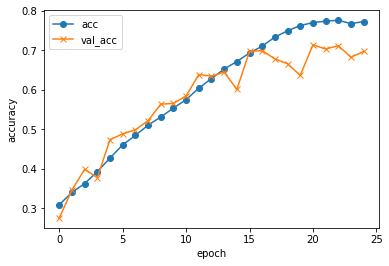

In [10]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

# モデルの定義
model = Sequential()
model.add(Conv2D(input_shape=(64, 64, 3), filters=32,kernel_size=(3, 3), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("sigmoid"))
model.add(Dense(96))
model.add(Activation('sigmoid'))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(5))
model.add(Activation('softmax'))

# コンパイル
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

#print(model.summary())


# 学習
history = model.fit(X_train, y_train, batch_size=32, epochs=25, verbose=1, validation_data=(X_test, y_test))

# 汎化制度の評価・表示
score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))

#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

#モデルを保存
model.save("model1119.h5")

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import  load_model
import sys
"""
spyderで実行するときは実行→ファイルごとの設定からコマンドライン引数を渡す
"""

def detect_face(image):
    #print(image.shape)
    #opencvを使って顔抽出
    image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("/content/drive/MyDrive/co_works/geekcamp224/haarcascade_frontalface_alt.xml")
    # 顔認識の実行
    face_list=cascade.detectMultiScale(image_gs, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
    #顔が１つ以上検出された時
    if len(face_list) > 0:
        for rect in face_list:
            x,y,width,height=rect
            cv2.rectangle(image, tuple(rect[0:2]), tuple(rect[0:2]+rect[2:4]), (255, 0, 0), thickness=3)
            img = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
            if image.shape[0]<64:
                print("too small")
                continue
            img = cv2.resize(image,(64,64))
            img=np.expand_dims(img,axis=0)
            name = detect_who(img)
            cv2.putText(image,name,(x,y+height+20),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(255,0,0),2)
    #顔が検出されなかった時
    else:
        print("no face")
    return image

def detect_who(img):
    #予測
    name=""
    #print(model.predict(img))
    nameNumLabel=np.argmax(model.predict(img))
    if nameNumLabel== 0: 
        name="Terada Ranze"
    elif nameNumLabel==1:
        name="Kanemura Miku"
    elif nameNumLabel==2:
        name="Miyata Manamo"
    elif nameNumLabel==3:
        name="Yamaguchi Haruyo"
    elif nameNumLabel==4:
        name="Yoda Yuuki"
    print(name)
    n=model.predict(img)
    lists=n[0].tolist()
    print(lists)
    return name

In [54]:
model = load_model('/content/drive/MyDrive/dateset/geekcamp224/models/model1246.h5')
image=cv2.imread("/content/IMG_3926.jpg")
if image is None:
    print("Not open:")
b,g,r = cv2.split(image)
image = cv2.merge([r,g,b])
whoImage=detect_face(image)

plt.figure(dpi=800)

plt.imshow(whoImage)
plt.show()
#plt.savefig("result2.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip freeze

In [31]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 32)        

In [ ]:
!python --version

Python 3.7.10


In [ ]:
!dir

drive  sample_data
